### Import libararies

In [227]:
import pandas as pd 
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import os
from numpy import linalg
from metric_learn import LMNN
from metric_learn import NCA

### Import data

In [182]:
z=pd.read_csv('wine.csv').to_numpy()

### Required Functions

In [183]:
def getAccuracy(predicts_label,train_label):
    correct = 0
    for x in range(len(predicts_label)):
        if predicts_label[x] == train_label[x]:
            correct += 1
    return (correct/float(len(predicts_label))) * 100.0
def calculate_accuracy(predict, test):
    return ((predict == test).mean())*100

In [184]:
def confusion_matrix(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
    
    return confmat

In [185]:
def Euclidian_Distance(instance1, instance2):
    distance = 0
    distance += pow((instance1 - instance2), 2)
    return math.sqrt(distance)

In [186]:
def split_data(data):
  train_data_size = int(np.floor(data.shape[0]*0.8))
  indexes = random.sample(range(0, data.shape[0]), train_data_size)
  indexes.sort()

  train = data[indexes]
  train_data, train_label = train[:, :], train[:, 0]
  listed_data = data.tolist()
  for i in range(train_data_size): listed_data.pop(indexes[i] - i)
  test = np.array(listed_data)
  test_data, test_label = test[:, :], test[:, 0]
  return train_data, test_data, train_label, test_label


In [187]:
def KNN(train_data, train_label, test_data, k):

    train_data, test_data = train_data.astype(float), test_data.astype(float)

    predicts = []
    length = len(test_data)-1
    for i in range(len(test_data)):
        distances = np.linalg.norm(test_data[i] - train_data, axis = 1)
        neighbors_index = np.argsort(distances)[0:k]
        predicts.append(np.bincount(train_label[neighbors_index].flatten().astype(int)).argmax())
    return predicts


In [188]:
def Metric_learn(train_data,train_label,test_data,k0,algorithm_type):
    
    train_data, test_data = train_data.astype(float), test_data.astype(float)
    lmnn = LMNN(k=k0, learn_rate=1e-7)
    nca  = NCA(max_iter=1000)
    lmnn.fit(train_data,train_label)
    nca.fit(train_data,train_label)

    if algorithm_type == 'LMNN':
        train_data_new_space =lmnn.transform(train_data)
        test_data_new_space=lmnn.transform(test_data)
    elif algorithm_type == 'NCA':
        train_data_new_space =nca.transform(train_data)
        test_data_new_space=nca.transform(test_data)
    
    predicts = []
    length = len(test_data_new_space)-1
    for i in range(len(test_data_new_space)):
        distances = np.linalg.norm(test_data_new_space[i] - train_data_new_space, axis = 1)
      ##  distances = Euclidian_Distance(test_data_new_space[i],train_data_new_space)
        neighbors_index = np.argsort(distances)[0:k0]
        predicts.append(np.bincount(train_label[neighbors_index].flatten().astype(int)).argmax())
    return predicts

### Reading Data & Shuffle

In [189]:

k = [3, 5,9,11,13,15]


training_data,testing_data,training_Label,testing_Label=split_data(z)

### Testing Performance K=3

In [211]:
#k = 3
predictions_KNN =  KNN(training_data,training_Label,testing_data,k[0])
predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k[0],'LMNN')
predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k[0],'NCA')


Accuracy_KNN  = getAccuracy(predictions_KNN, testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_KNN, testing_Label)


Accuracy_LMNN = getAccuracy(predictions_LMNN,testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_LMNN, testing_Label)


Accuracy_NCA  = getAccuracy(predictions_NCA, testing_Label)
confusion_matrix_NCA=confusion_matrix(predictions_NCA, testing_Label)

print('Accuracy of KNN is: %% %1.2f' %(Accuracy_KNN))
print(confusion_matrix_KNN)


print('Accuracy of LMNN is: %% %1.2f' %(Accuracy_LMNN))
print(confusion_matrix_LMNN)


print('Accuracy of NCA is: %% %1.2f' %(Accuracy_NCA))
print(confusion_matrix_NCA)




Accuracy of KNN is: % 69.44
[[14.  5.]
 [ 0. 13.]]
Accuracy of LMNN is: % 97.22
[[ 9.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  1. 13.]]
Accuracy of NCA is: % 72.22
[[ 7.  0.  1.]
 [ 0. 11.  4.]
 [ 2.  3.  8.]]


### Testing Performance K=5

In [212]:
#k = 5
predictions_KNN =  KNN(training_data,training_Label,testing_data,k[1])
predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k[1],'LMNN')
predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k[1],'NCA')


Accuracy_KNN  = getAccuracy(predictions_KNN, testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_KNN, testing_Label)


Accuracy_LMNN = getAccuracy(predictions_LMNN,testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_LMNN, testing_Label)


Accuracy_NCA  = getAccuracy(predictions_NCA, testing_Label)
confusion_matrix_NCA=confusion_matrix(predictions_NCA, testing_Label)


print('Accuracy of KNN is: %% %1.2f' %(Accuracy_KNN))
print(confusion_matrix_KNN)


print('Accuracy of LMNN is: %% %1.2f' %(Accuracy_LMNN))
print(confusion_matrix_LMNN)


print('Accuracy of NCA is: %% %1.2f' %(Accuracy_NCA))
print(confusion_matrix_NCA)






Accuracy of KNN is: % 72.22
[[14.  5.]
 [ 0. 13.]]
Accuracy of LMNN is: % 97.22
[[ 9.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  1. 13.]]
Accuracy of NCA is: % 80.56
[[ 7.  0.  0.]
 [ 0. 11.  2.]
 [ 2.  3. 11.]]


### Testing Performance K=9

In [213]:
#k = 9
predictions_KNN =  KNN(training_data,training_Label,testing_data,k[2])
predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k[2],'LMNN')
predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k[2],'NCA')


Accuracy_KNN  = getAccuracy(predictions_KNN, testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_KNN, testing_Label)


Accuracy_LMNN = getAccuracy(predictions_LMNN,testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_LMNN, testing_Label)


Accuracy_NCA  = getAccuracy(predictions_NCA, testing_Label)
confusion_matrix_NCA=confusion_matrix(predictions_NCA, testing_Label)


print('Accuracy of KNN is: %% %1.2f' %(Accuracy_KNN))
print(confusion_matrix_KNN)


print('Accuracy of LMNN is: %% %1.2f' %(Accuracy_LMNN))
print(confusion_matrix_LMNN)


print('Accuracy of NCA is: %% %1.2f' %(Accuracy_NCA))
print(confusion_matrix_NCA)





Accuracy of KNN is: % 69.44
[[14.  5.]
 [ 0. 13.]]
Accuracy of LMNN is: % 94.44
[[ 8.  0.  0.]
 [ 1. 13.  0.]
 [ 0.  1. 13.]]
Accuracy of NCA is: % 72.22
[[ 7.  1.  1.]
 [ 0. 11.  4.]
 [ 2.  2.  8.]]


### Testing Performance K=11

In [214]:
#k = 11
predictions_KNN =  KNN(training_data,training_Label,testing_data,k[3])
predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k[3],'LMNN')
predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k[3],'NCA')


Accuracy_KNN  = getAccuracy(predictions_KNN, testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_KNN, testing_Label)


Accuracy_LMNN = getAccuracy(predictions_LMNN,testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_LMNN, testing_Label)


Accuracy_NCA  = getAccuracy(predictions_NCA, testing_Label)
confusion_matrix_NCA=confusion_matrix(predictions_NCA, testing_Label)


print('Accuracy of KNN is: %% %1.2f' %(Accuracy_KNN))
print(confusion_matrix_KNN)


print('Accuracy of LMNN is: %% %1.2f' %(Accuracy_LMNN))
print(confusion_matrix_LMNN)


print('Accuracy of NCA is: %% %1.2f' %(Accuracy_NCA))
print(confusion_matrix_NCA)




Accuracy of KNN is: % 66.67
[[14.  5.]
 [ 0. 13.]]
Accuracy of LMNN is: % 94.44
[[ 8.  0.  0.]
 [ 1. 13.  0.]
 [ 0.  1. 13.]]
Accuracy of NCA is: % 63.89
[[ 6.  0.  1.]
 [ 0. 10.  5.]
 [ 3.  4.  7.]]


### Testing Performance K=13

In [215]:
#k = 13
predictions_KNN =  KNN(training_data,training_Label,testing_data,k[4])
predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k[4],'LMNN')
predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k[4],'NCA')


Accuracy_KNN  = getAccuracy(predictions_KNN, testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_KNN, testing_Label)


Accuracy_LMNN = getAccuracy(predictions_LMNN,testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_LMNN, testing_Label)


Accuracy_NCA  = getAccuracy(predictions_NCA, testing_Label)
confusion_matrix_NCA=confusion_matrix(predictions_NCA, testing_Label)


print('Accuracy of KNN is: %% %1.2f' %(Accuracy_KNN))
print(confusion_matrix_KNN)


print('Accuracy of LMNN is: %% %1.2f' %(Accuracy_LMNN))
print(confusion_matrix_LMNN)


print('Accuracy of NCA is: %% %1.2f' %(Accuracy_NCA))
print(confusion_matrix_NCA)




Accuracy of KNN is: % 69.44
[[14.  5.]
 [ 0. 13.]]
Accuracy of LMNN is: % 94.44
[[ 8.  0.  0.]
 [ 1. 13.  0.]
 [ 0.  1. 13.]]
Accuracy of NCA is: % 66.67
[[ 7.  0.  0.]
 [ 0. 10.  6.]
 [ 2.  4.  7.]]


### Testing Performance K=15

In [216]:
#k = 15
predictions_KNN =  KNN(training_data,training_Label,testing_data,k[5])
predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k[5],'LMNN')
predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k[5],'NCA')


Accuracy_KNN  = getAccuracy(predictions_KNN, testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_KNN, testing_Label)


Accuracy_LMNN = getAccuracy(predictions_LMNN,testing_Label)
confusion_matrix_LMNN=confusion_matrix(predictions_LMNN, testing_Label)


Accuracy_NCA  = getAccuracy(predictions_NCA, testing_Label)
confusion_matrix_NCA=confusion_matrix(predictions_NCA, testing_Label)


print('Accuracy of KNN is: %% %1.2f' %(Accuracy_KNN))
print(confusion_matrix_KNN)


print('Accuracy of LMNN is: %% %1.2f' %(Accuracy_LMNN))
print(confusion_matrix_LMNN)


print('Accuracy of NCA is: %% %1.2f' %(Accuracy_NCA))
print(confusion_matrix_NCA)






Accuracy of KNN is: % 72.22
[[14.  5.]
 [ 0. 13.]]
Accuracy of LMNN is: % 91.67
[[ 8.  0.  0.]
 [ 1. 13.  1.]
 [ 0.  1. 12.]]
Accuracy of NCA is: % 75.00
[[ 6.  0.  0.]
 [ 0. 11.  3.]
 [ 3.  3. 10.]]


### Finding The best K value 


In [221]:
k_values = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
k_dimansion=np.size(k_values)

In [222]:
vector_accuracy_LMNN=np.zeros(k_dimansion)
vector_accuracy_NCA =np.zeros(k_dimansion)

In [223]:
for i in range(k_dimansion):
    predictions_LMNN=  Metric_learn(training_data,training_Label,testing_data,k_values[i],'LMNN')
    predictions_NCA =  Metric_learn(training_data,training_Label,testing_data,k_values[i],'NCA')
    vector_accuracy_LMNN[i]=getAccuracy(predictions_LMNN, testing_Label)
    vector_accuracy_NCA[i] =getAccuracy(predictions_NCA, testing_Label)
    


Text(0.5, 1.0, 'LMNN Accuracy based on k values')

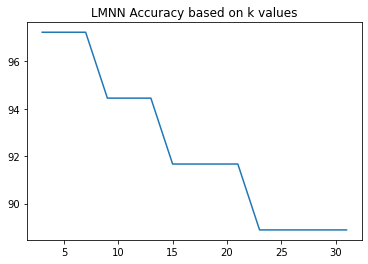

In [228]:
plt.plot(k_values,vector_accuracy_LMNN)
plt.title("LMNN Accuracy based on k values")

Text(0.5, 1.0, 'NCA Accuracy based on k values')

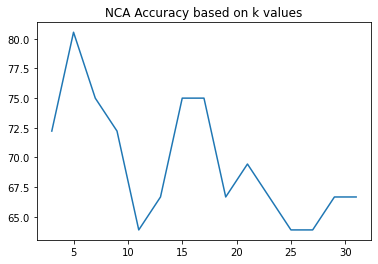

In [229]:
plt.plot(k_values,vector_accuracy_NCA)
plt.title("NCA Accuracy based on k values")